# Data Project - Stock Market Analysis 

![techAnalysis-1000x500.jpg](attachment:techAnalysis-1000x500.jpg)

In this notebook we will be looking at data from the stock market, particularly some technology stocks. We will learn how to use pandas to get stock information, visualize different aspects of it, and finally we will look at a few ways of analyzing the risk of a stock, based on its previous performance history. We will also be predicting future stock prices through a Long Short Term Memory (LSTM) method!

We'll be answering the following questions along the way:

    1.) What was the change in price of the stock over time?
    2.) What was the daily return of the stock on average?
    3.) What was the moving average of the various stocks?
    4.) What was the correlation between different stocks'?
    5.) How much value do we put at risk by investing in a particular stock?
    6.) How can we attempt to predict future stock behavior? (Predicting the closing price stock price of APPLE inc using LSTM)
   

# 1. What was the change in price of the stock overtime?

In this section we'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.

In [1]:
!pip install -q hvplot
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader
!pip install -q yfinance

     |████████████████████████████████| 3.1 MB 11.7 MB/s 
     |████████████████████████████████| 109 kB 10.8 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0
     |████████████████████████████████| 6.4 MB 12.7 MB/s 
     |████████████████████████████████| 63 kB 657 kB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
import pandas as pd
import numpy as np
from keras.utils.vis_utils import plot_model

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf

# For time stamps
from datetime import datetime

Let's go ahead and play aorund with the AAPL DataFrame to get a feel for the data

Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock.

# 6. Predicting the closing price stock price of APPLE inc:

In [10]:
# Get the stock quote
df = DataReader('AAPL', data_source='yahoo', start='2012-01-01', end=datetime.now())
# Show teh data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.557465
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.624951
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.765112
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.898554
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.878095
...,...,...,...,...,...,...
2022-05-09,155.830002,151.490005,154.929993,152.059998,131577900.0,152.059998
2022-05-10,156.740005,152.929993,155.520004,154.509995,115366700.0,154.509995
2022-05-11,155.449997,145.809998,153.500000,146.500000,142689800.0,146.500000


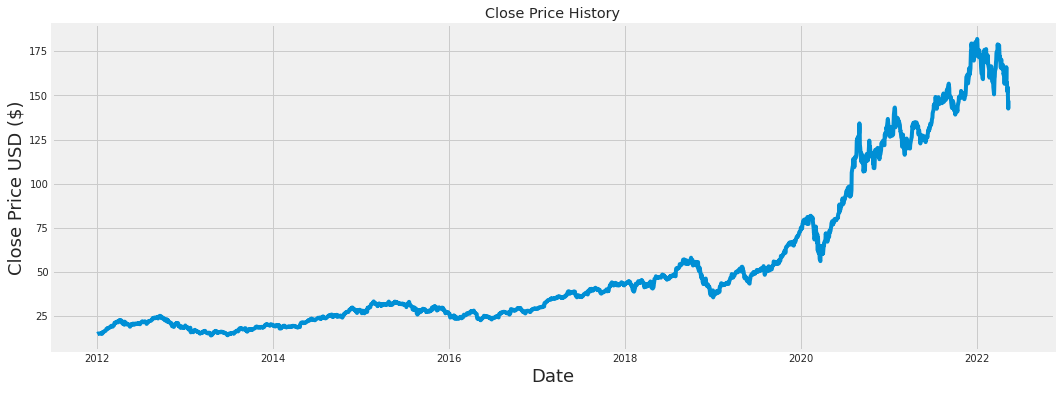

In [11]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [12]:
df=pd.read_csv("/content/stock.csv")
tweets_dataframe=pd.read_csv("/content/Tweets_sentiment.csv")
df=df.merge(tweets_dataframe,on=['Date'])
df.head
df.to_csv('joinedTable.csv')

In [13]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  # Create a new dataframe with only the 'Close column 
#data=df.loc[:, 'polarity','Close/Last']

data =df[['polarity',' Close/Last']]
# Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len
dataset

array([[  0.  , 293.65],
       [  0.  , 293.65],
       [ -0.5 , 293.65],
       ...,
       [  0.  ,  59.97],
       [  0.4 ,  59.97],
       [  0.  ,  59.97]])

In [14]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.5       , 1.        ],
       [0.5       , 1.        ],
       [0.25      , 1.        ],
       ...,
       [0.5       , 0.01666386],
       [0.7       , 0.01666386],
       [0.5       , 0.01666386]])

In [15]:
train_data = scaled_data[0:int(training_data_len), :]
#train_data=dataset
train_data

array([[0.5       , 1.        ],
       [0.5       , 1.        ],
       [0.25      , 1.        ],
       ...,
       [0.5       , 0.10233967],
       [0.3       , 0.10414913],
       [0.75      , 0.10414913]])

In [16]:
# Create the training data set 
# Create the scaled training data set

# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0:2])
    y_train.append(train_data[i, 0:2])
    #if i<= 61:
        #print(x_train)
        #print(y_train)
        #print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 2))
x_train.shape
x_train


array([[[0.5       , 1.        ],
        [0.5       , 1.        ],
        [0.25      , 1.        ],
        ...,
        [0.45      , 0.81110082],
        [0.5       , 0.81110082],
        [0.4875    , 0.81110082]],

       [[0.5       , 1.        ],
        [0.25      , 1.        ],
        [0.61      , 1.        ],
        ...,
        [0.5       , 0.81110082],
        [0.4875    , 0.81110082],
        [0.95      , 0.81110082]],

       [[0.25      , 1.        ],
        [0.61      , 1.        ],
        [0.5       , 1.        ],
        ...,
        [0.4875    , 0.81110082],
        [0.95      , 0.81110082],
        [0.5325    , 0.81110082]],

       ...,

       [[0.75      , 0.10995624],
        [0.5       , 0.10995624],
        [0.1875    , 0.12556809],
        ...,
        [0.5       , 0.10233967],
        [0.5       , 0.10233967],
        [0.7       , 0.10233967]],

       [[0.5       , 0.10995624],
        [0.1875    , 0.12556809],
        [0.5       , 0.12556809],
        .

In [17]:
y_train

array([[0.95      , 0.81110082],
       [0.5325    , 0.81110082],
       [0.58041667, 0.81110082],
       ...,
       [0.5       , 0.10233967],
       [0.3       , 0.10414913],
       [0.75      , 0.10414913]])

In [18]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 2)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(2))
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=5)

Epoch 1/5
2410/2410 [==============================] - 58s 23ms/step - loss: 0.0099
Epoch 2/5
2410/2410 [==============================] - 57s 24ms/step - loss: 0.0089
Epoch 3/5
2410/2410 [==============================] - 54s 22ms/step - loss: 0.0086
Epoch 4/5
2410/2410 [==============================] - 57s 24ms/step - loss: 0.0085
Epoch 5/5
2410/2410 [==============================] - 58s 24ms/step - loss: 0.0086


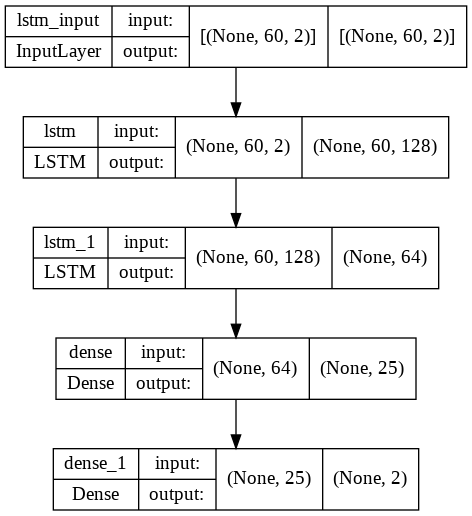

In [19]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [20]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0:2])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 2))

# Get the models predicted price values 
predictions = model.predict(x_test)
pd.DataFrame(predictions).to_csv('beforeReshape.csv')
predictions = scaler.inverse_transform(predictions)

#print(predictions.shape)
#print(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print(rmse)


1.7618667094242955


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


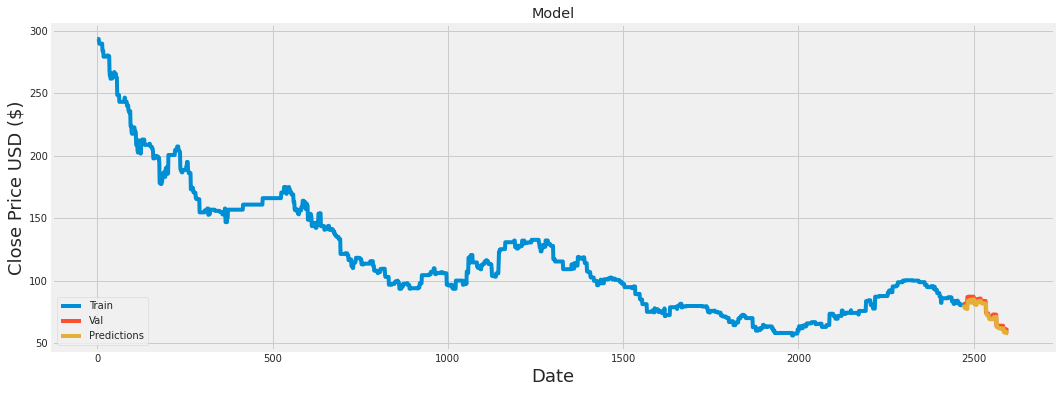

In [24]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions[:,1]
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train[' Close/Last'])
plt.plot(valid[[' Close/Last', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower left')
plt.show()

In [23]:
# Show the valid and predicted prices
valid

,polarity,Close/Last,Predictions
2470,0.0,80.76,78.294861
2471,0.2,80.76,78.557640
2472,-0.6,80.76,78.493538
2473,0.5,80.76,79.052887
2474,0.5,80.76,78.204826
...,...,...,...
2595,0.0,59.97,58.046535
2596,0.0,59.97,57.849010
2597,0.0,59.97,57.789974
2598,0.4,59.97,57.786053
